<a href="https://colab.research.google.com/github/saraalbagory/ml-project/blob/main/alphabet_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sachinpatel21/az-handwritten-alphabets-in-csv-format")

print("Path to dataset files:", path)

c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Menna\.cache\kagglehub\datasets\sachinpatel21\az-handwritten-alphabets-in-csv-format\versions\5


In [2]:
import pandas as pd

data = pd.read_csv(path + "/A_Z Handwritten Data.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


The ord function returns the Unicode (ASCII) code point of a character.


In [3]:
import numpy as np

#get the last column
numericLabels =data.iloc[:,0].unique()

# for i in numericLabels:
#   print(f"Label: {chr(i + ord('A'))}")
# print(numericLabels)
# convert the number to labels
uniqueLabels = np.array([chr(i + ord('A')) for i in numericLabels])
print(uniqueLabels)
len=numericLabels.size
print(f"the number of classes: {len}")

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
the number of classes: 26


show their distribution

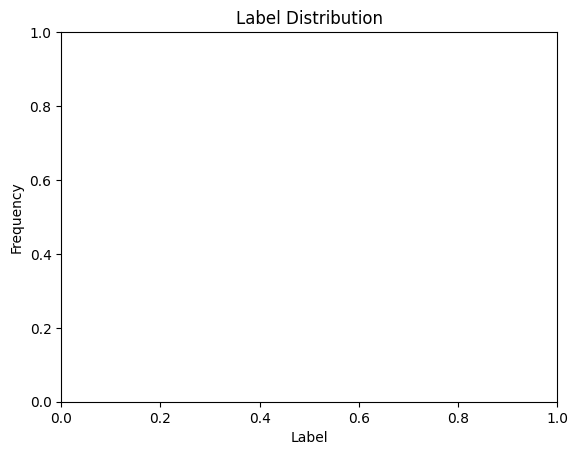

In [76]:
import matplotlib.pyplot as plt

numericLabels =data.iloc[:,0]
labels = np.array([chr(i + ord('A')) for i in numericLabels])
# plt.hist(labels, bins=len)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


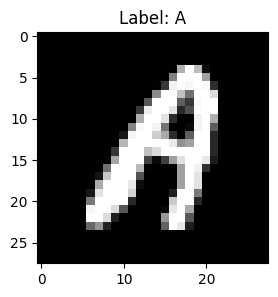

In [5]:
import matplotlib.pyplot as plt

data.info()
first_row = data.iloc[0]
label = first_row.iloc[0]
image_data = first_row.iloc[1:].values

# Reshape the pixel data to 28x28 matrix format
image = image_data.reshape((28, 28))

# Display the image
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.title(f"Label: {chr(label + ord('A'))}")  # Convert label number to letter
plt.show()

In [6]:
image_data=data.iloc[:,1:]
normalized_image_data=image_data/255
print(normalized_image_data)
normalized_image_data.describe()

        0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.639  0.640  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
372445  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372446  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372447  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372448  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   
372449  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.6

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,3.724500e+05,3.724500e+05
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000006,0.000006,0.000004,0.000004,0.000003,0.000002,0.000002,0.000003,9.370912e-07,4.211646e-08
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001925,0.002029,0.001652,0.001644,0.001512,0.001254,0.000819,0.001315,5.288302e-04,2.570312e-05
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988235,0.886275,0.898039,0.894118,0.921569,0.760784,0.403922,0.776471,3.215686e-01,1.568627e-02


In [7]:
# import tensorflow as tf
# normalized_features2=tf.keras.utils.normalize(features,axis=1)

Reshape the Flattened Vectors to Reconstruct and Display the Images

In [8]:
# reshaped_images = []
# for _, row in normalized_image_data.iterrows():  # Loop through each row
#     reshaped_image = row.values.reshape(28, 28)
#     reshaped_images.append(reshaped_image)
# reshaped_images = np.array(reshaped_images)
reshaped_images = normalized_image_data.values.reshape(-1, 28, 28)
# for i in range(10):
#   plt.figure(figsize=(1,1))
#   plt.imshow(reshaped_images[i], cmap='gray')
#   plt.title(f"label : {labels[i]}")
#   plt.show()

In [9]:
from sklearn.model_selection import train_test_split

numericLabels=data.iloc[:,0]
image_train, image_test, label_train, label_test=train_test_split(reshaped_images,numericLabels,test_size=0.2,random_state=42)
image_train_2d = image_train.reshape(image_train.shape[0], -1)
image_test_2d = image_test.reshape(image_test.shape[0], -1)

In [10]:
# from sklearn.svm import SVC

# model =SVC(C=1000,kernel='linear')
# model.fit(image_train_2d,label_train)

Split the training dataset into training and validation datasets

In [11]:
image_train, image_val, label_train, label_val = train_test_split(image_train, label_train, test_size=0.2, random_state=42)

In [12]:
print("Unique labels in training data:", np.unique(label_train))


Unique labels in training data: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [13]:
from keras import utils as utils
#from tensorflow.keras.utils import to_categorical

label_train_onehot = utils.to_categorical(label_train, num_classes=26)
label_val_onehot = utils.to_categorical(label_val, num_classes=26)

reshape for cnn models

In [14]:
image_train_2d_tf = image_train.reshape(-1, 28, 28, 1)
image_val_2d_tf = image_val.reshape(-1, 28, 28, 1)
image_test_2d_tf = image_test.reshape(-1, 28, 28, 1)

In [15]:
print("Unique labels in validation data:", np.unique(label_val))


Unique labels in validation data: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


MODEL 1

In [16]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

model1 = (keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
]))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
history1 = model1.fit(image_train_2d_tf, label_train_onehot, validation_data=(image_val_2d_tf, label_val_onehot), epochs=10,batch_size=128)

Epoch 1/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.8832 - loss: 0.4212 - val_accuracy: 0.9745 - val_loss: 0.0931
Epoch 2/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9786 - loss: 0.0773 - val_accuracy: 0.9807 - val_loss: 0.0713
Epoch 3/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9848 - loss: 0.0527 - val_accuracy: 0.9832 - val_loss: 0.0604
Epoch 4/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9886 - loss: 0.0391 - val_accuracy: 0.9856 - val_loss: 0.0534
Epoch 5/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9908 - loss: 0.0306 - val_accuracy: 0.9879 - val_loss: 0.0464
Epoch 6/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9930 - loss: 0.0231 - val_accuracy: 0.9874 - val_loss: 0.0481
Epoch 7/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9947 - loss: 0.0176 - val_accuracy: 0.9887 - val_loss: 0.0462
Epoch 8/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9960 -

In [18]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,782,416 (6.80 MB)

 Trainable params: 594,138 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,188,278 (4.53 MB)

c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


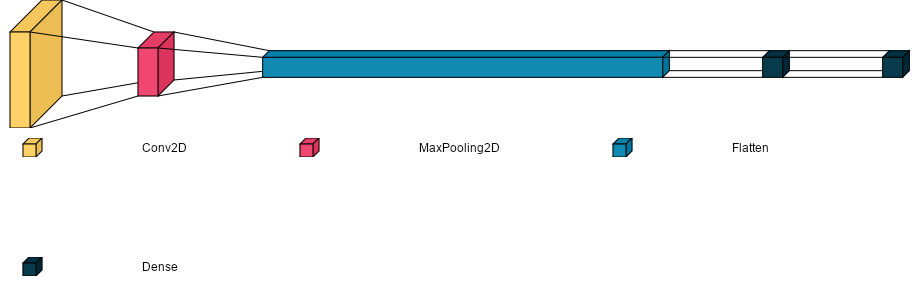

In [19]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model1, legend=True, font=font,spacing=100)

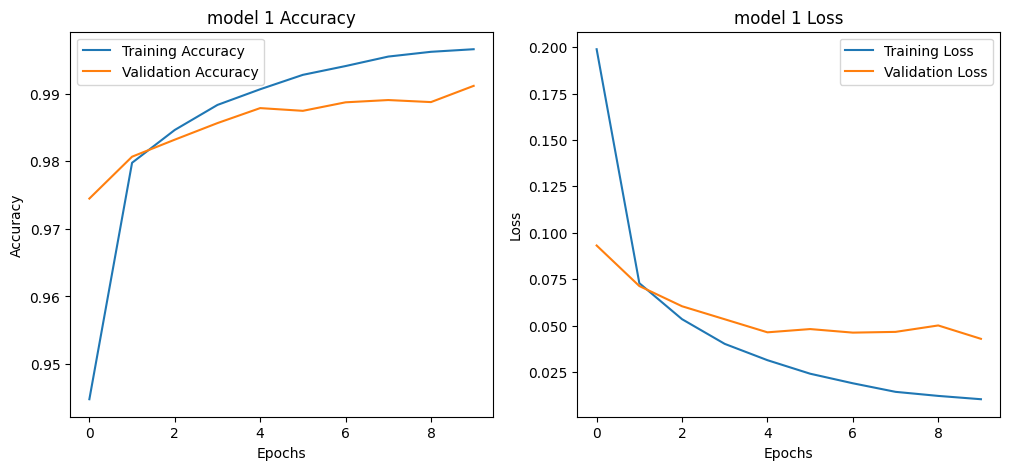

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('model 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL 2

In [23]:
keras.Sequential([])
model2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(image_train_2d_tf, label_train_onehot, validation_data=(image_val_2d_tf, label_val_onehot), epochs=10,batch_size=128)


c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 64s 32ms/step - accuracy: 0.8001 - loss: 0.6888 - val_accuracy: 0.9647 - val_loss: 0.1155
Epoch 2/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9597 - loss: 0.1369 - val_accuracy: 0.9727 - val_loss: 0.0918
Epoch 3/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9700 - loss: 0.1034 - val_accuracy: 0.9797 - val_loss: 0.0690
Epoch 4/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9746 - loss: 0.0835 - val_accuracy: 0.9812 - val_loss: 0.0660
Epoch 5/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9786 - loss: 0.0710 - val_accuracy: 0.9814 - val_loss: 0.0647
Epoch 6/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9805 - loss: 0.0634 - val_accuracy: 0.9832 - val_loss: 0.0581
Epoch 7/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9832 - loss: 0.0549 - val_accuracy: 0.9850 - val_loss: 0.0525
Epoch 8/10
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9847 -

In [24]:
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,136 (1.51 MB)

 Trainable params: 132,378 (517.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264,758 (1.01 MB)

c:\Users\Menna\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


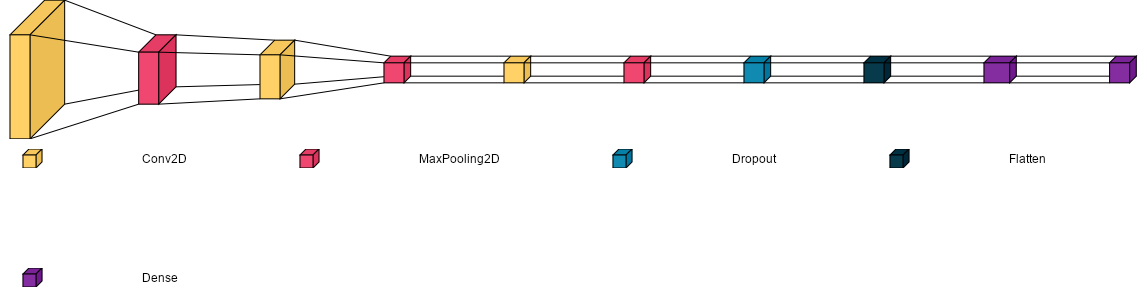

In [25]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model2, legend=True, font=font,spacing=100)

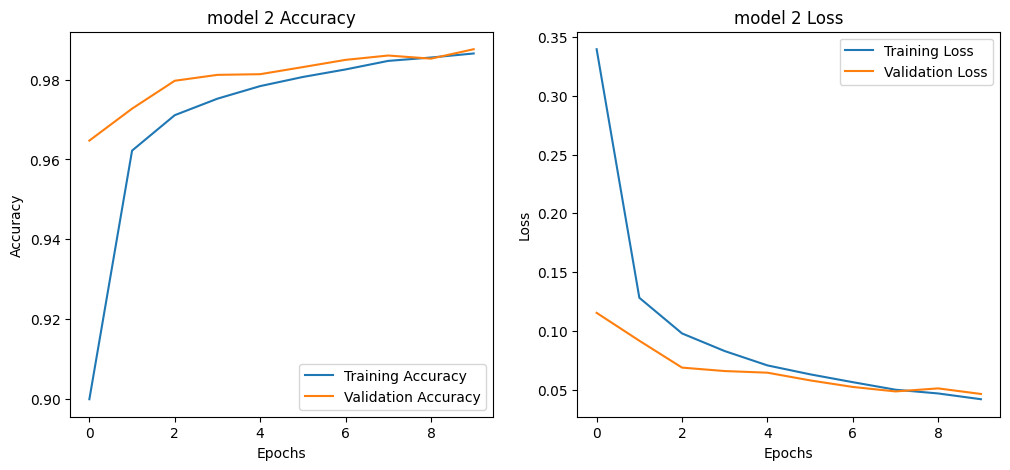

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('model 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

saving the best Model

In [60]:
model2.save('best_model.h5')

loading the model

In [61]:
best_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
# # Check label_test dimensions
# if len(label_test.shape) > 1:  # If one-hot encoded
#     label_test_flat = np.argmax(label_test, axis=1)  # Convert to class indices
# else:
#     label_test_flat = label_test  # Already in 1D format

In [220]:
# # Make predictions
# predictions = best_model.predict(image_test)

# # Convert predictions to class indices (highest probability)
# predicted_labels = np.argmax(predictions, axis=1)

# # Print some sample predictions
# for i in range(10):
#     print(f"True Label: {label_test_flat[i]}, Predicted Label: {predicted_labels[i]}")


In [38]:
import cv2

In [80]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [81]:
def predict_Characters(characters):
    char_labels = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    predictions = []
    characters_batch = np.stack(characters)
    model_predictions  = best_model.predict(characters_batch)
    predicted_labels = np.argmax(model_predictions, axis=1)
    
    for labels in predicted_labels:
        predicted_char = char_labels[labels]
        predictions.append(predicted_char)
       
    print(predictions)

In [95]:
# Load and preprocess the image
def preprocess_and_segment_image(filepath):
    image = cv2.imread(filepath)
    # Display the original image of my handwriting
    plt.figure(figsize=(8, 8))
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

    # Apply adaptive threshold. (Regular threshold doesn't work as well.)
    binary_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 41, 25)

    # Apply connected component labeling (from hw2)
    num_labels, labels_im = cv2.connectedComponents(binary_image, connectivity=8)

    characters = []
    bounding_boxes = []

    for label in range(1, num_labels):
        mask = (labels_im == label).astype(np.uint8) * 255

        # https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html 
        x, y, w, h = cv2.boundingRect(mask)

        if w < 10 or h < 10: # Ignore noise. (Like dust on paper. See michelle-handwriting dataset)
            continue
        
        character = binary_image[y:y+h, x:x+w]
        resized_character = cv2.resize(character, (18, 18))
        padded_character = np.pad(resized_character, ((5, 5), (5, 5)), mode='constant', constant_values=0)
        
        characters.append(padded_character)
        bounding_boxes.append((x, y, w, h))

    combined = list(zip(bounding_boxes, characters))
    sorted_combined = sorted(combined, key=lambda item: item[0][0])
    sorted_characters = [item[1] for item in sorted_combined]
    print(sorted_characters)
    # print(len(sorted_characters))
    fig, axs = plt.subplots(1, len(sorted_characters), figsize=(15, 5))
    if len(sorted_characters) == 1:
        axs = [axs]
    for i, char_img in enumerate(sorted_characters):
        axs[i].imshow(char_img, cmap='gray')
        axs[i].axis('off')
    plt.show()


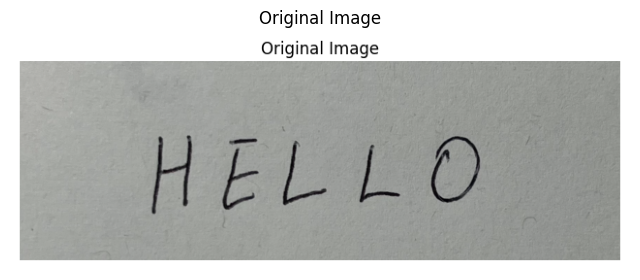

[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,   0,
          0,   0,   0, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,
          0,   0],
       [ 

TypeError: 'int' object is not callable

In [96]:
test1 = preprocess_and_segment_image("D:/FOURTH_T1/ML/final project/hello.png")

In [84]:
predict_Characters(test1)

NameError: name 'test1' is not defined

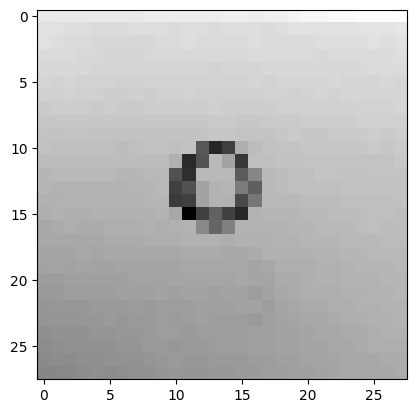

In [65]:
plt.imshow(img, cmap='gray')
plt.show()

In [66]:
# Make predictions
predictions =  best_model.predict(img_array)
predicted_letter_index = np.argmax(predictions)
predicted_letter = chr(65 + predicted_letter_index)  # Assuming A-Z mapping

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [67]:
print(f"Predicted letter: {predicted_letter}")

Predicted letter: U


In [ ]:
# print("Neural Network Confusion Matrix:\n", confusion_matrix(label_val, predictions))
# print("Neural Network F1-Score:", f1_score(label_val, predictions, average='weighted'))